 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()
# whale_returns_df.dtypes

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
algo_returns_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [7]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace(',', '')
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close'] = sp500_history_df['Close'].astype(float)

In [12]:
# Calculate Daily Returns
pct_change = sp500_history_df.pct_change()
pct_change.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls
pct_change.dropna(inplace=True)
pct_change.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename Column
pct_change = pct_change.rename(columns={'Close': 'SandP500'})
pct_change.head()

,SandP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
Combined_returns = pd. concat([pct_change, whale_returns_df, algo_returns_df],join="inner", axis="columns")
Combined_returns.head()

,SandP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2019-04-22,-0.008764,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936
2019-04-18,-0.001011,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2019-04-17,-0.001577,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-16,0.002279,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-15,-0.000509,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

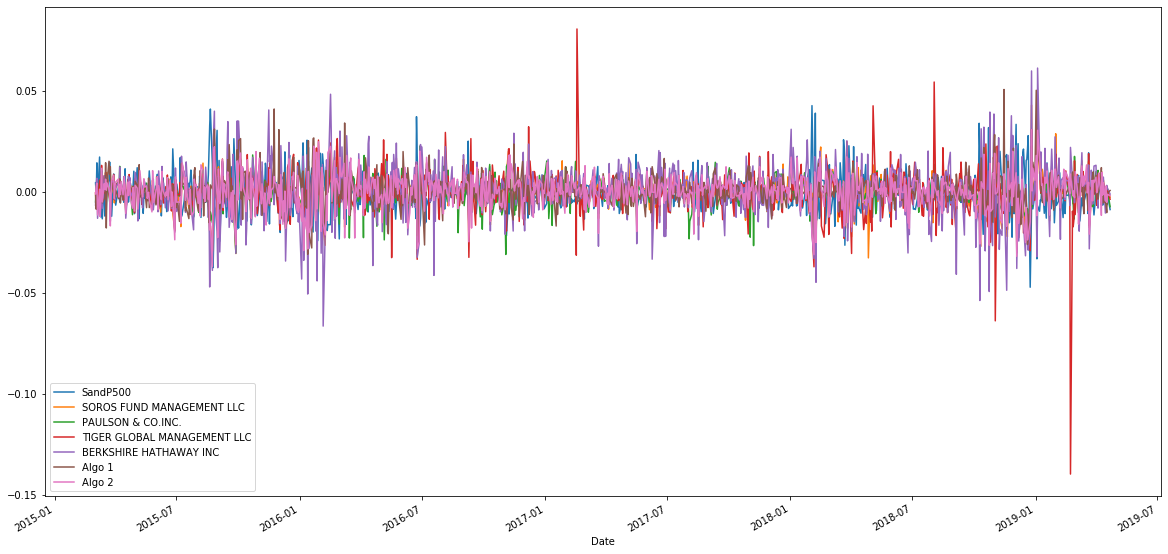

In [16]:
# Plot daily returns
Combined_returns.plot(figsize = (20,10))

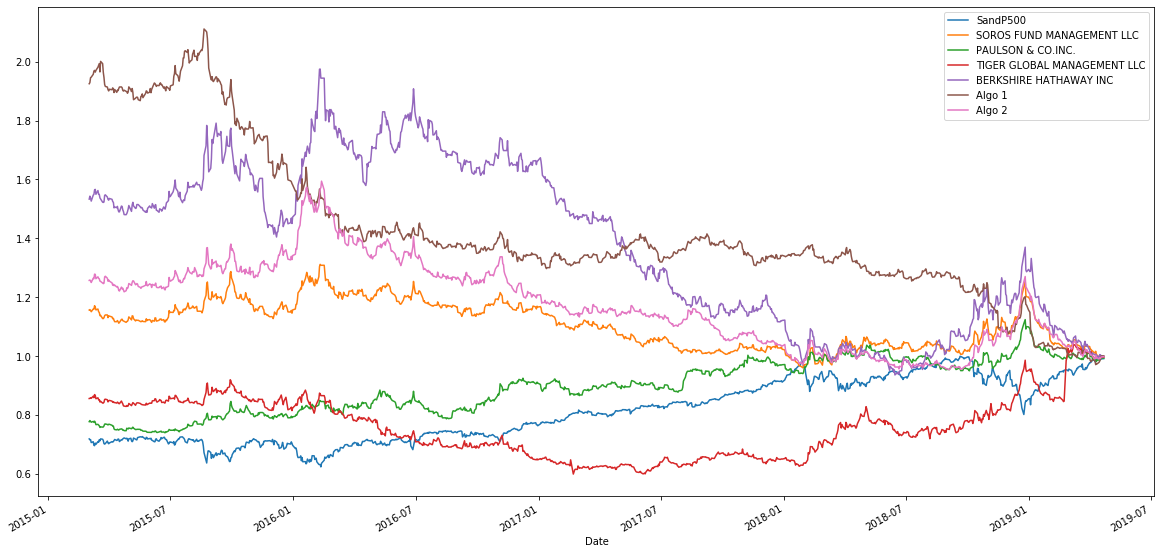

In [17]:
# Plot cumulative returns
cum_returns = (1 + Combined_returns).cumprod()
cum_returns.plot(figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

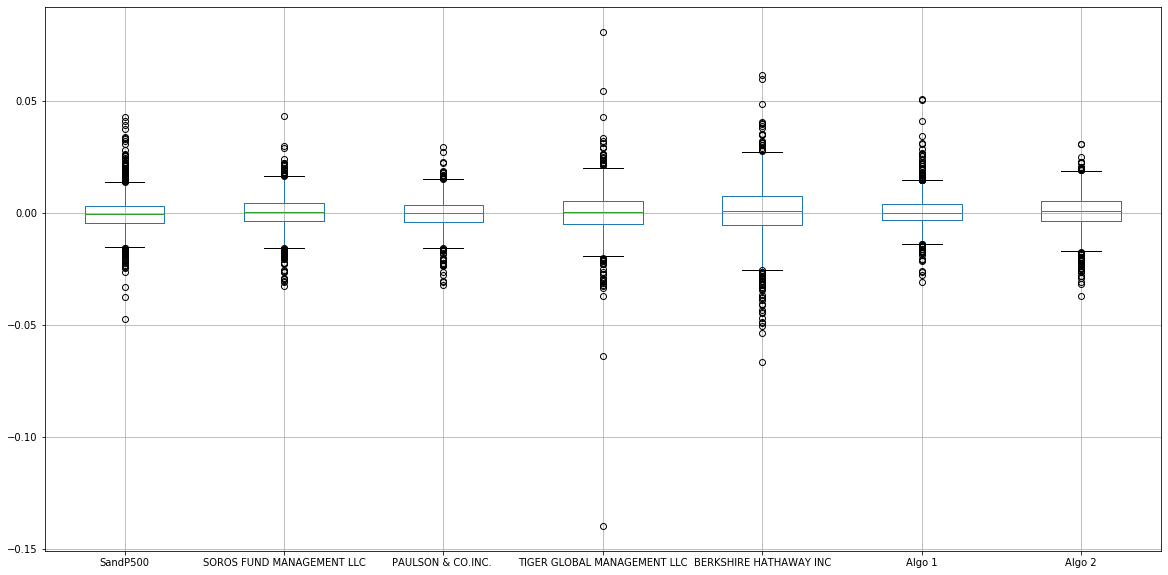

In [18]:
# Box plot to visually show risk
Combined_returns.boxplot(figsize = (20,10))


In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
Combined_returns.std()

SandP500                       0.008587
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
dtype: float64

In [20]:
# Determine which portfolios are riskier than the S&P 500
SandP500std = Combined_returns["SandP500"].std()
Combined_returns.std() > SandP500std

SandP500                       False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
dtype: bool

In [21]:
# Calculate the annualized standard deviation (252 trading days)
Combined_returns.std() * np.sqrt(252)

SandP500                       0.136313
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

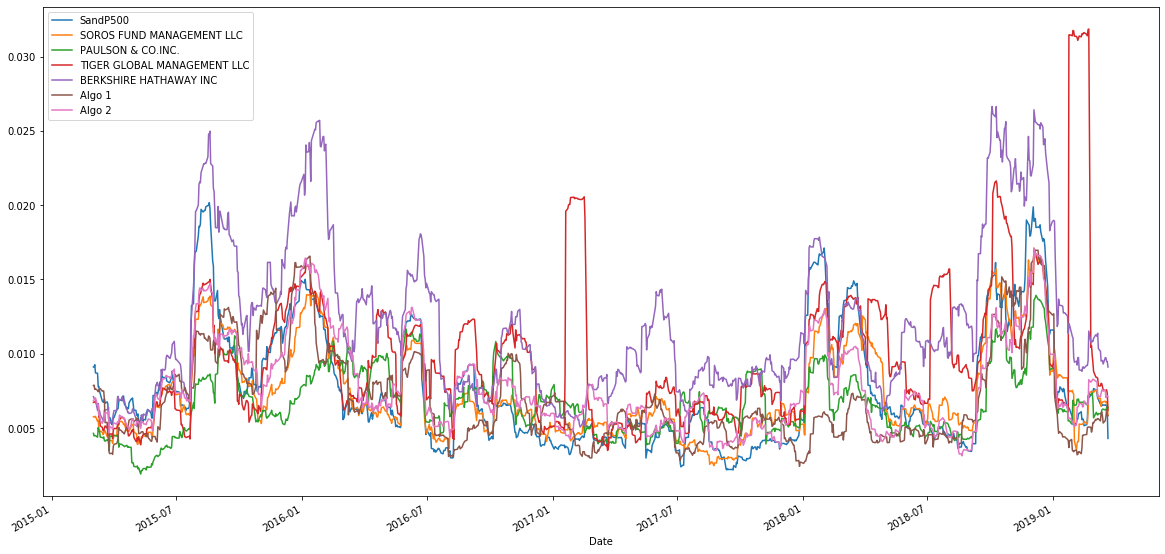

In [22]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
Combined_returns.rolling(21).std().plot(figsize = (20,10))

In [23]:
# Correlation
correlation = Combined_returns.corr()
correlation.style.background_gradient(cmap='rainbow')

,SandP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SandP500,1.000000,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192
SOROS FUND MANAGEMENT LLC,0.000574,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730
PAULSON & CO.INC.,0.013549,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160
BERKSHIRE HATHAWAY INC,-0.013856,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756
Algo 1,-0.033963,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852
Algo 2,-0.002192,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000


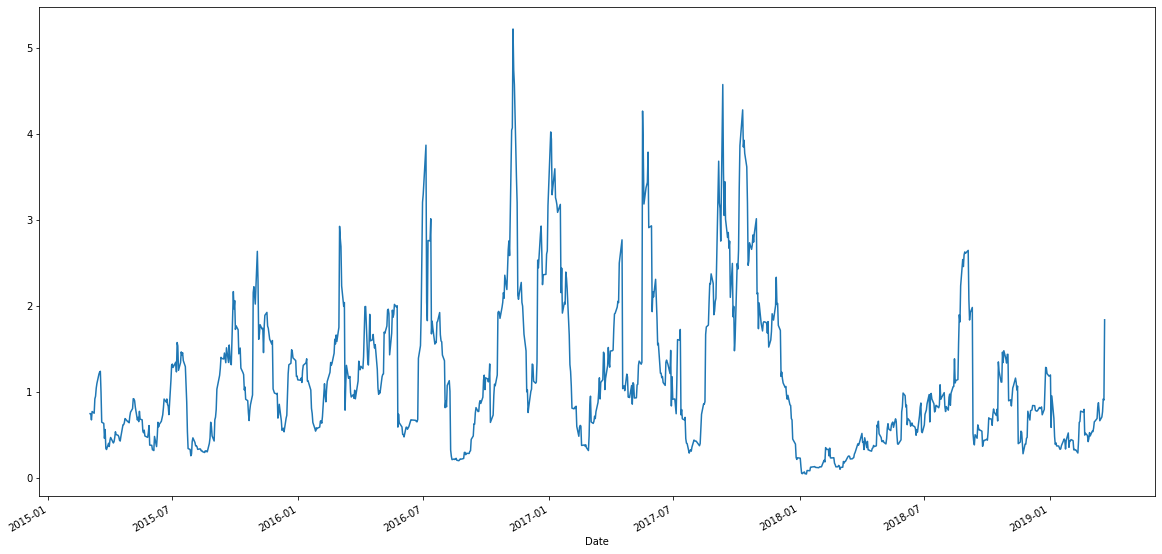

In [24]:
# Calculate Beta for a single portfolio compared to the total market 
Algo_1 = Combined_returns["Algo 1"].rolling(21).cov()
Algo_1
SandP500beta = Combined_returns["SandP500"].rolling(21).var()
Beta = Algo_1 / SandP500beta
Beta.plot(figsize = (20,10))

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [25]:
Combined_returns.ewm(halflife = 21).mean()

,SandP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2019-04-22,-0.008764,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936
2019-04-18,-0.004823,-0.000536,-0.002985,-0.001494,0.000439,0.000034,-0.001577
2019-04-17,-0.003705,-0.001349,-0.004184,-0.002498,0.001397,-0.003525,-0.002834
2019-04-16,-0.002134,-0.000286,-0.002984,-0.002061,0.001250,-0.004423,-0.001329
2019-04-15,-0.001787,-0.000529,-0.002594,-0.001536,-0.001256,-0.004403,-0.002021
...,...,...,...,...,...,...,...
2015-03-09,-0.000050,0.000683,0.000803,0.000671,0.000415,0.000480,0.000352
2015-03-06,-0.000176,0.000404,0.000661,0.000373,-0.000024,0.000304,-0.000031
2015-03-05,0.000296,0.000521,0.000772,0.000438,0.000195,0.000263,0.000110


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [26]:
# Annualzied Sharpe Ratios
sharpe_ratios = (Combined_returns.mean() * 252) / (Combined_returns.std() * np.sqrt(252))
sharpe_ratios

SandP500                      -0.518582
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

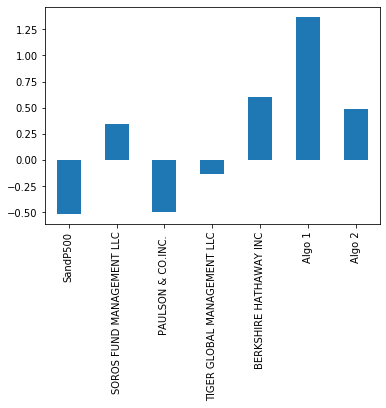

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock
aapl_historical = Path('Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.drop('Symbol', axis = 1, inplace=True)

aapl_df.columns = ['AAPL']

aapl_df.head()


,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [29]:
# Read the second stock
cost_historical = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.drop('Symbol', axis = 1, inplace=True)

cost_df.columns = ['COST']
cost_df.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [30]:
# Read the third stock
goog_historical = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

goog_df.drop('Symbol', axis = 1, inplace=True)

goog_df.columns =['GOOG']
goog_df.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [31]:
# Concatenate all stocks into a single DataFrame
all_stocks = pd.concat([goog_df, aapl_df, cost_df],join="inner", axis="columns")
all_stocks.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [32]:
returns = all_stocks.pct_change().dropna()
returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


In [33]:
# Reset the index
# returns.reset_index(inplace=True)

In [34]:
# Drop Nulls
returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
weights = [1/3, 1/3, 1/3]
all_returns = returns.dot(weights)
        


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# YOUR CODE HERE
returns['all_returns'] = all_returns
returns.head()

,GOOG,AAPL,COST,all_returns
Trade DATE,,,,
2019-05-08,0.003347,0.010861,-0.008749,0.001820
2019-05-07,0.006714,-0.000197,-0.004806,0.000570
2019-05-06,0.013023,0.027704,0.016862,0.019196
2019-05-03,-0.003355,0.015685,0.001597,0.004642
2019-05-02,-0.019226,-0.012279,-0.007890,-0.013131


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns = returns.dropna()
returns.head()

,GOOG,AAPL,COST,all_returns
Trade DATE,,,,
2019-05-08,0.003347,0.010861,-0.008749,0.001820
2019-05-07,0.006714,-0.000197,-0.004806,0.000570
2019-05-06,0.013023,0.027704,0.016862,0.019196
2019-05-03,-0.003355,0.015685,0.001597,0.004642
2019-05-02,-0.019226,-0.012279,-0.007890,-0.013131


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
Combined_returns['all_returns'] = all_returns
Combined_returns.head()


,SandP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,all_returns
Date,,,,,,,,
2019-04-22,-0.008764,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.011812
2019-04-18,-0.001011,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001148
2019-04-17,-0.001577,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001541
2019-04-16,0.002279,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,-0.009149
2019-04-15,-0.000509,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000326


In [39]:
returns.std()

GOOG           0.016714
AAPL           0.018923
COST           0.013439
all_returns    0.013363
dtype: float64

In [40]:
Combined_returns.std() * np.sqrt(252)

SandP500                       0.136313
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
all_returns                    0.213137
dtype: float64

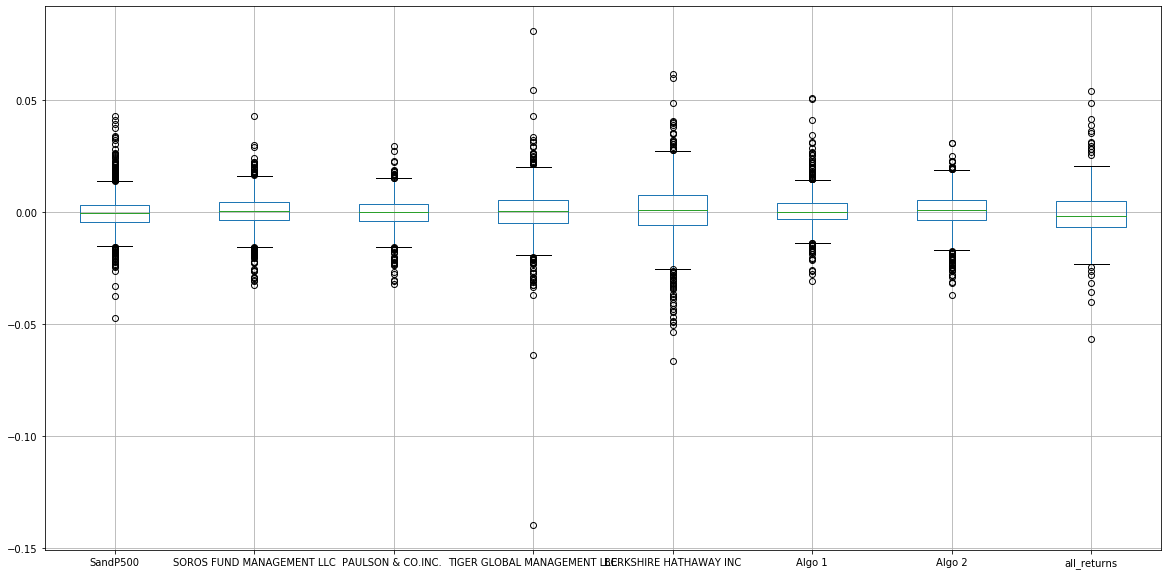

In [41]:
Combined_returns.boxplot(figsize = [20, 10])

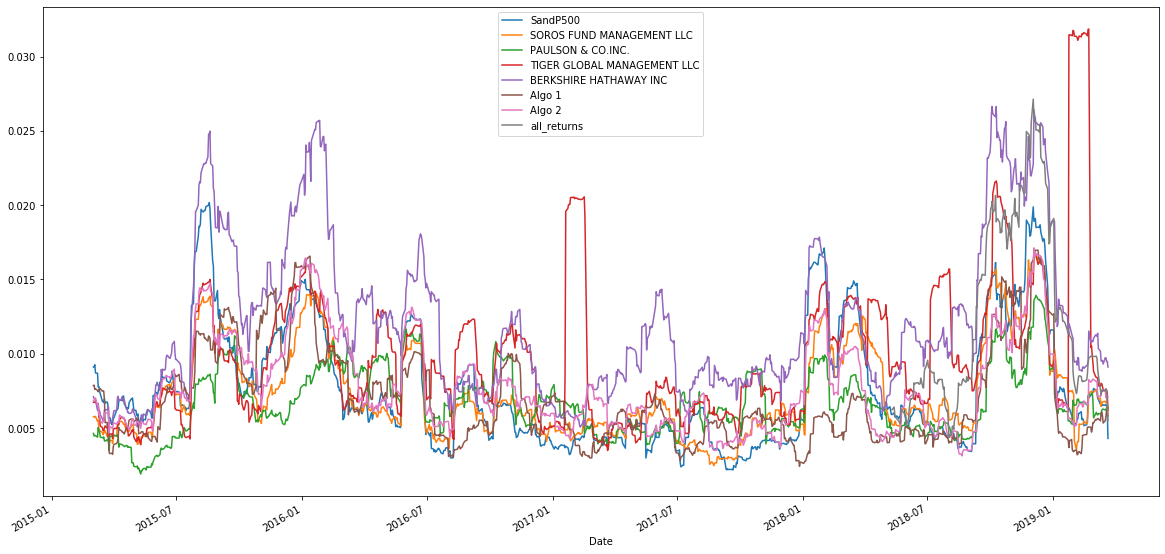

In [42]:
# Rolling
Combined_returns.rolling(21).std().plot(figsize = (20,10))

In [43]:
correlation = Combined_returns.corr()
correlation.style.background_gradient(cmap='rainbow')

,SandP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,all_returns
SandP500,1.000000,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,0.869976
SOROS FUND MANAGEMENT LLC,0.000574,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.061503
PAULSON & CO.INC.,0.013549,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.025680
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,0.036047
BERKSHIRE HATHAWAY INC,-0.013856,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,0.006755
Algo 1,-0.033963,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,0.073296
Algo 2,-0.002192,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,0.039910
all_returns,0.869976,0.061503,0.025680,0.036047,0.006755,0.073296,0.039910,1.000000


In [44]:
Combined_returns

,SandP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,all_returns
Date,,,,,,,,
2019-04-22,-0.008764,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.011812
2019-04-18,-0.001011,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001148
2019-04-17,-0.001577,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001541
2019-04-16,0.002279,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,-0.009149
2019-04-15,-0.000509,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000326
...,...,...,...,...,...,...,...,...
2015-03-09,0.017254,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,NaN
2015-03-06,-0.003929,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,NaN
2015-03-05,0.014378,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,NaN


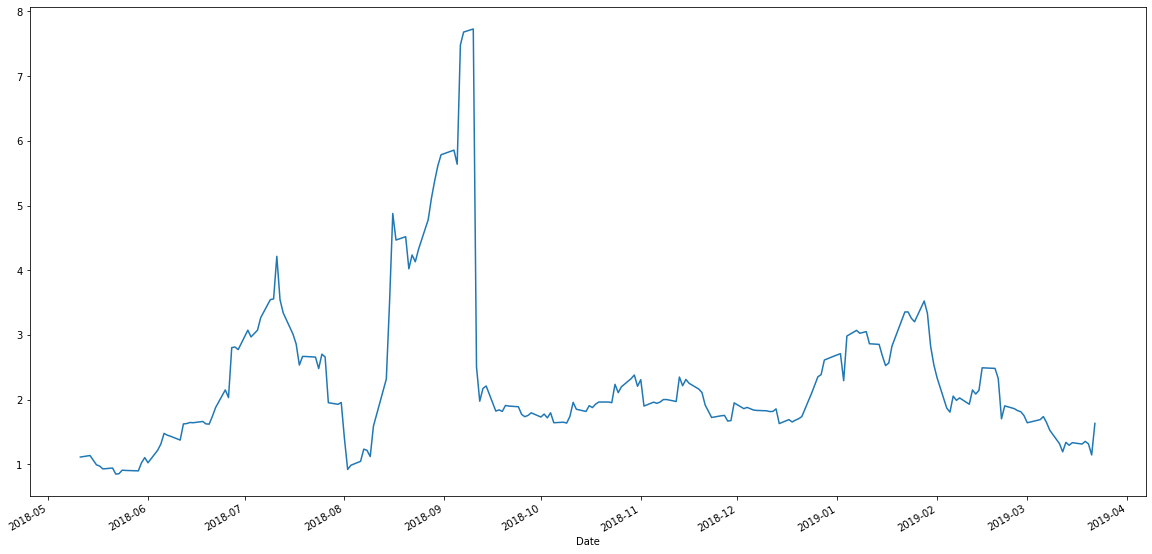

In [45]:
# Beta
Compared_returns = Combined_returns["all_returns"].rolling(21).cov()
SandP500beta = Combined_returns["SandP500"].rolling(21).var()
Beta = Compared_returns / SandP500beta
Beta.plot(figsize = (20,10))


In [51]:
print(Compared_returns)

Date
2019-04-22   NaN
2019-04-18   NaN
2019-04-17   NaN
2019-04-16   NaN
2019-04-15   NaN
              ..
2015-03-09   NaN
2015-03-06   NaN
2015-03-05   NaN
2015-03-04   NaN
2015-03-03   NaN
Name: all_returns, Length: 1042, dtype: float64


In [46]:
# Annualzied Sharpe Ratios
Annualized_sharpe_ratios = (Combined_returns.mean() * 252) / (Combined_returns.std() * np.sqrt(252))
Annualized_sharpe_ratios

SandP500                      -0.518582
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
all_returns                   -0.613547
dtype: float64

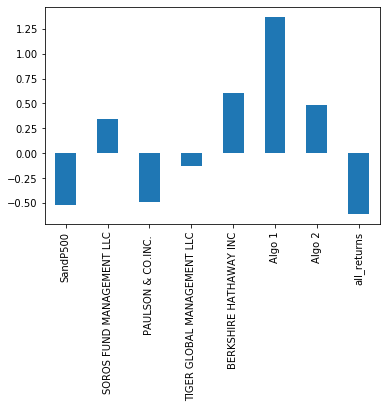

In [47]:
# Visualize the sharpe ratios as a bar plot
Annualized_sharpe_ratios.plot(kind = "bar")

## Include correlation analysis to determine which stocks (if any) are correlated

In [49]:
# YOUR CODE HERE
correlation = Combined_returns.corr()
correlation.style.background_gradient(cmap='rainbow')

,SandP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,all_returns
SandP500,1.000000,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,0.869976
SOROS FUND MANAGEMENT LLC,0.000574,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.061503
PAULSON & CO.INC.,0.013549,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.025680
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,0.036047
BERKSHIRE HATHAWAY INC,-0.013856,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,0.006755
Algo 1,-0.033963,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,0.073296
Algo 2,-0.002192,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,0.039910
all_returns,0.869976,0.061503,0.025680,0.036047,0.006755,0.073296,0.039910,1.000000
